# DataLab task 3 

### Plant instance segmentation 

### Deliverables:
- The code (task_3.ipynb), with comments/docstrings explaining each step. 
- The notebook should display the output of the code on task_3_image_1.png and task_3_image_2.png.
### Client Requirements
- Your code should only rely on traditional computer vision methods. In other words, do not use an ML/DL model.
- The quality of the segmentation will be qualitatively assessed by comparing it to Figure 3.1
- The code should work for at least task_3_image_1.png and task_3_image_2.png.
- An output similar to Figure 3.1 is shown in task_3.ipynb for the images task_3_image_1.png and task_3_image_2.png.

In [379]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

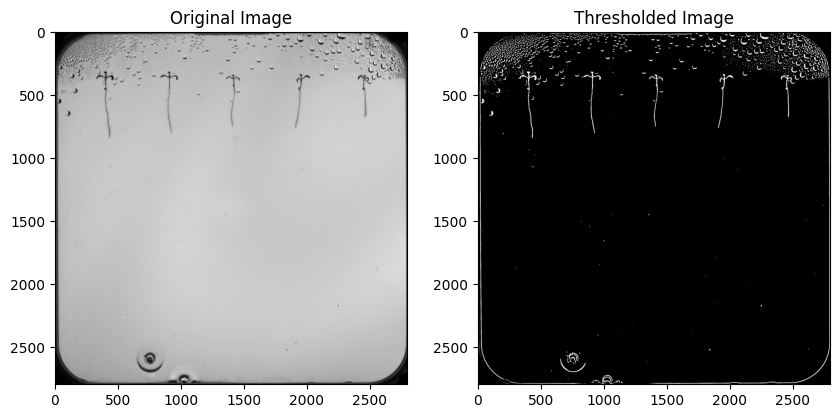

In [380]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('cropped_image_1.png', cv2.IMREAD_GRAYSCALE)

# Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(img, (3, 3), 0)

# Use adaptive thresholding to handle varying illumination
thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY_INV, 15, 12)

# Morphological operations to clean up noise
kernel = np.ones((2, 2), np.uint8)
closing = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

# Connected components 

# filter by size 


# Create a mask to cover the edges of the image
mask = np.zeros_like(closing)
edge_thickness = 100 
mask[edge_thickness:-edge_thickness, edge_thickness:-edge_thickness] = 255 
   
# Apply the mask to remove edge noise
closing = cv2.bitwise_and(closing, mask)

# Find contours to isolate roots
contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area to remove small noise
min_contour_area = 50
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

# Create a blank image to draw the contours
output_img = np.zeros_like(img)

# Draw the contours on the blank image
cv2.drawContours(output_img, filtered_contours, -1, (255), thickness=cv2.FILLED)

# Display the results
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(thresholded, cmap='gray')
plt.title('Thresholded Image')

plt.show()


In [381]:
# Thresholding 

# connected components 

# Filtering by size 

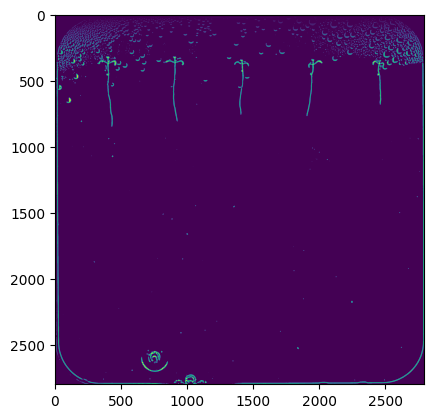

In [382]:
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(thresholded)
plt.imshow(labels)

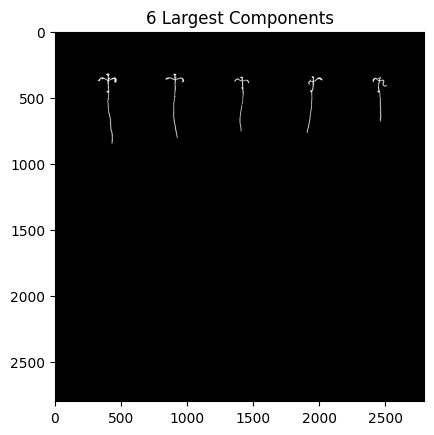

In [383]:
# Perform connected components analysis
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(closing)

# Get areas of all components (excluding the background)
areas = stats[1:, cv2.CC_STAT_AREA]  
sorted_indices = np.argsort(areas)[::-1]  

# Keep largest components
largest_indices = sorted_indices[:5] + 1  

# Create an output image with only the largest components
output_img = np.zeros_like(closing)
for index in largest_indices:
    output_img[labels == index] = 255

# Display the result
plt.imshow(output_img, cmap='gray')
plt.title('6 Largest Components')
plt.show()

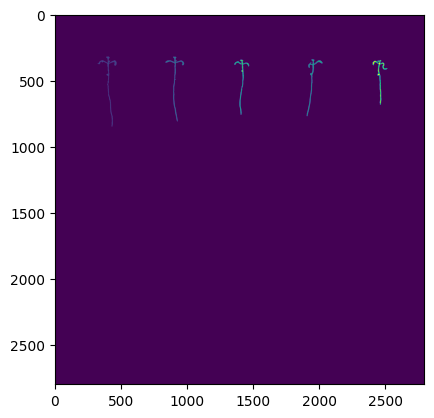

In [384]:
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(output_img)
plt.imshow(labels)

In [385]:
areas = stats[:, -1]
areas

array([7797174,    5323,    4345,    3896,    3359,    3519], dtype=int32)

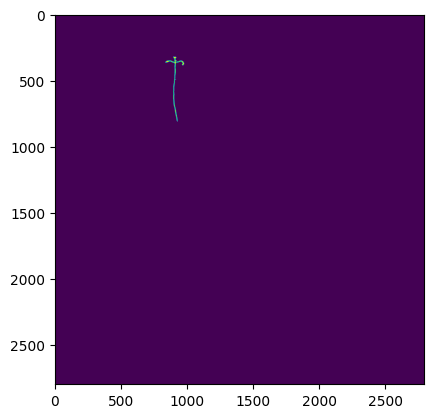

In [386]:
ind = np.argsort(areas)[-3]
plt.imshow(labels==ind)

In [387]:
np.set_printoptions(threshold=np.inf) 
print(stats)

# area
# width times height 

[[      0       0    2796    2796 7797174]
 [    322     321     144     531    5323]
 [    835     323     140     489    4345]
 [   1903     341     118     431    3896]
 [   1356     345     110     415    3359]
 [   2401     349     110     335    3519]]


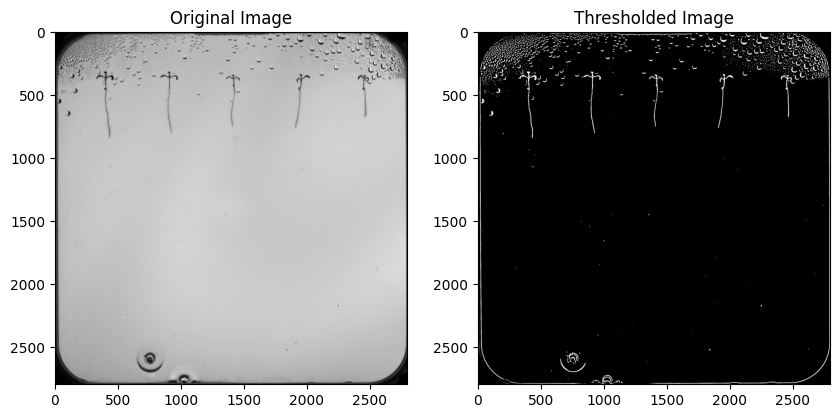

In [388]:
def process_image(image_path, edge_thickness=100, min_contour_area=100):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(img, (3, 3), 0)

    # Use adaptive thresholding to handle varying illumination
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 15, 12)

    # Apply morphological operations to clean up the noise
    kernel = np.ones((2, 2), np.uint8)
    closing = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    # Find contours to isolate roots
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask to cover the edges of the image
    mask = np.ones_like(closing) * 255  
    mask[edge_thickness:-edge_thickness, edge_thickness:-edge_thickness] = 0 

    # Apply the mask to remove edge noise
    closing = cv2.bitwise_and(closing, mask)

    # Filter contours based on area to remove small noise
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    # Create a blank image to draw the contours
    output_img = np.zeros_like(img)

    # Draw the contours on the blank image
    cv2.drawContours(output_img, filtered_contours, -1, (255), thickness=cv2.FILLED)

    # Display the results
    plt.figure(figsize=(10, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image')

    plt.show()

    return output_img

output_img = process_image('cropped_image_1.png')  




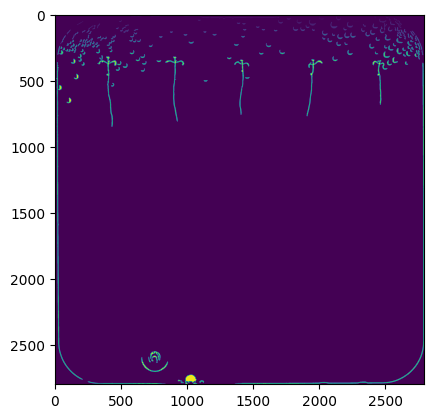

In [389]:
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(output_img)
plt.imshow(labels)


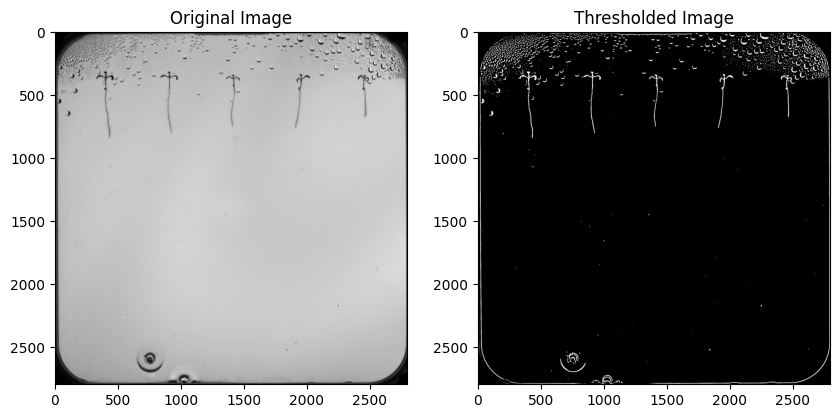

In [390]:
def process_image(image_path, edge_thickness=100, min_contour_area=100):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(img, (3, 3), 0)

    # Use adaptive thresholding to handle varying illumination
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 15, 12)

    # Apply morphological operations to clean up the noise
    kernel = np.ones((2, 2), np.uint8)
    closing = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    # Find contours to isolate roots
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask to cover the edges of the image
    mask = np.ones_like(closing) * 255  
    mask[edge_thickness:-edge_thickness, edge_thickness:-edge_thickness] = 0 

    # Apply the mask to remove edge noise
    closing = cv2.bitwise_and(closing, mask)

    # Filter contours based on area to remove small noise
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    # Create a blank image to draw the contours
    output_img = np.zeros_like(img)

    # Draw the contours on the blank image
    cv2.drawContours(output_img, filtered_contours, -1, (255), thickness=cv2.FILLED)

    # Perform connected components analysis
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(closing)

    # Get areas of all components (excluding the background)
    areas = stats[1:, cv2.CC_STAT_AREA]  
    sorted_indices = np.argsort(areas)[::-1]  

    # Keep largest components
    largest_indices = sorted_indices[:5] + 1  

    # Create an output image with only the largest components
    output_img = np.zeros_like(closing)
    for index in largest_indices:
        output_img[labels == index] = 255

    # Display the results
    plt.figure(figsize=(10, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image')

    plt.show()

    return output_img

output_img = process_image('cropped_image_1.png')  




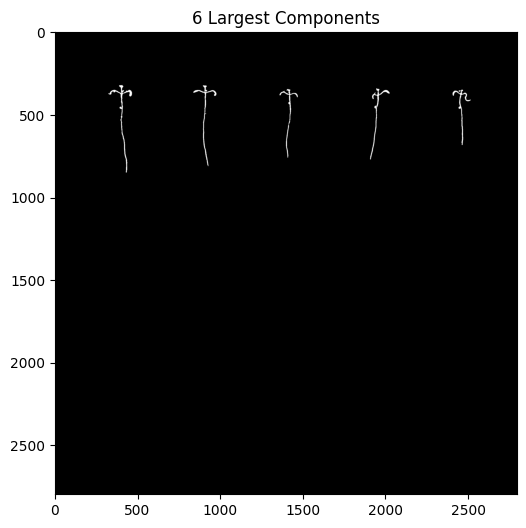

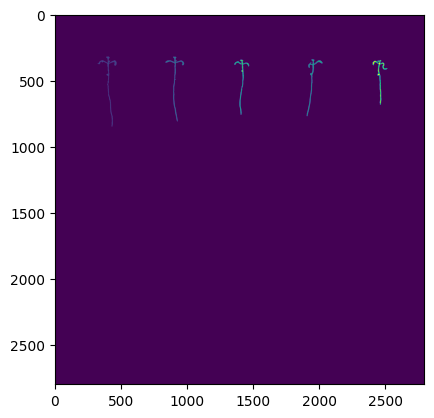

In [391]:
# Step 1: Load the image and pre-process it
img = cv2.imread('cropped_image_1.png', cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(img, (3, 3), 0)
thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY_INV, 15, 12)

# Step 2: Clean up noise using morphological operations
kernel = np.ones((2, 2), np.uint8)
cleaned = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

# Step 3: Remove edge noise using a mask
edge_thickness = 100
mask = np.zeros_like(cleaned)
mask[edge_thickness:-edge_thickness, edge_thickness:-edge_thickness] = 255 
cleaned = cv2.bitwise_and(cleaned, mask)

# Step 4: Filter out small contours
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
min_contour_area = 50
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

# Step 5: Draw filtered contours on a blank image
output_img = np.zeros_like(img)
cv2.drawContours(output_img, filtered_contours, -1, (255), thickness=cv2.FILLED)

# Step 6: Perform connected components analysis to isolate the largest components
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned)
areas = stats[1:, cv2.CC_STAT_AREA]  
sorted_indices = np.argsort(areas)[::-1]  
largest_indices = sorted_indices[:5] + 1 

# Step 7: Create an output image with only the largest components
output_img = np.zeros_like(cleaned)
for index in largest_indices:
    output_img[labels == index] = 255


# Step 8: Display the result
plt.figure(figsize=(8, 6))

plt.imshow(output_img, cmap='gray')
plt.title('6 Largest Components')
plt.show()

retval, labels, stats, centroids = cv2.connectedComponentsWithStats(output_img)
plt.imshow(labels)


In [392]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path, edge_thickness=100, min_contour_area=50, num_largest_components=5):
    """
    Processes an image to identify and extract the largest connected components.

    Parameters:
    - image_path (str): Path to the input image.
    - edge_thickness (int): Thickness of the edge mask to exclude border noise.
    - min_contour_area (int): Minimum area for a contour to be kept.
    - num_largest_components (int): Number of largest connected components to keep.

    Returns:
    - output_img (numpy.ndarray): The processed image with the largest components isolated.
    - labels (numpy.ndarray): The connected component labels of the final image.
    """
    # Step 1: Load the image and pre-process it
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred = cv2.GaussianBlur(img, (3, 3), 0)
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 15, 12)

    # Step 2: Clean up noise using morphological operations
    kernel = np.ones((2, 2), np.uint8)
    cleaned = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    # Step 3: Remove edge noise using a mask
    mask = np.zeros_like(cleaned)
    mask[edge_thickness:-edge_thickness, edge_thickness:-edge_thickness] = 255 
    cleaned = cv2.bitwise_and(cleaned, mask)

    # Step 4: Filter out small contours
    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    # Step 5: Draw filtered contours on a blank image
    output_img = np.zeros_like(img)
    cv2.drawContours(output_img, filtered_contours, -1, (255), thickness=cv2.FILLED)

    # Step 6: Perform connected components analysis to isolate the largest components
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned)
    areas = stats[1:, cv2.CC_STAT_AREA]  # Exclude background
    sorted_indices = np.argsort(areas)[::-1]  # Sort areas in descending order
    largest_indices = sorted_indices[:num_largest_components] + 1  # Keep the N largest components

    # Step 7: Create an output image with only the largest components
    output_img = np.zeros_like(cleaned)
    for index in largest_indices:
        output_img[labels == index] = 255

    # Step 8: Display the results
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image')

    plt.subplot(1, 3, 3)
    plt.imshow(output_img, cmap='gray')
    plt.title(f'{num_largest_components} Largest Components')
    plt.show()

    return output_img, labels


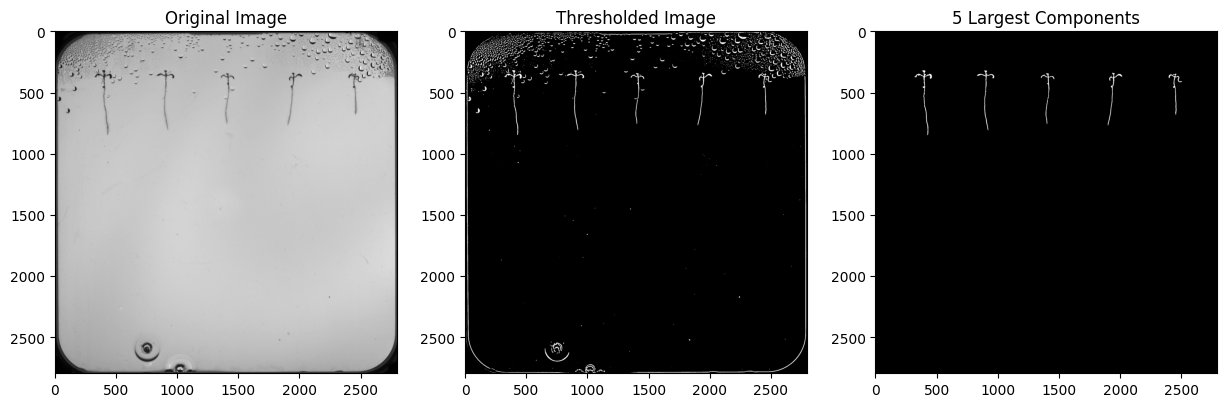

In [393]:
output_img, labels = process_image(
    image_path='cropped_image_1.png', 
    edge_thickness=100, 
    min_contour_area=50, 
    num_largest_components=5
)


In [394]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path, edge_thickness=None, min_contour_area=None, num_largest_components=5):
    """
    Processes an image to identify and extract the largest connected components.

    Parameters:
    - image_path (str): Path to the input image.
    - edge_thickness (int, optional): Thickness of the edge mask to exclude border noise. Default is 5% of image size.
    - min_contour_area (int, optional): Minimum area for a contour to be kept. Default is 0.1% of image size.
    - num_largest_components (int): Number of largest connected components to keep.

    Returns:
    - output_img (numpy.ndarray): The processed image with the largest components isolated.
    - labels (numpy.ndarray): The connected component labels of the final image.
    """
    # Step 1: Load the image and pre-process it
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded.")
    
    # Set edge thickness and contour area dynamically if not provided
    if edge_thickness is None:
        edge_thickness = int(0.05 * min(img.shape[:2]))  # 5% of image height/width
    if min_contour_area is None:
        min_contour_area = 0.001 * img.shape[0] * img.shape[1]  # 0.1% of total image area

    blurred = cv2.GaussianBlur(img, (3, 3), 0)
    
    # Use adaptive thresholding with a larger block size to generalize to more images
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 31, 10)  # Larger block size
    
    # Step 2: Clean up noise using morphological operations
    kernel = np.ones((2, 2), np.uint8)
    cleaned = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    # Step 3: Remove edge noise using a mask
    mask = np.zeros_like(cleaned)
    mask[edge_thickness:-edge_thickness, edge_thickness:-edge_thickness] = 255 
    cleaned = cv2.bitwise_and(cleaned, mask)

    # Step 4: Filter out small contours
    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    # Step 5: Draw filtered contours on a blank image
    output_img = np.zeros_like(img)
    cv2.drawContours(output_img, filtered_contours, -1, (255), thickness=cv2.FILLED)

    # Step 6: Perform connected components analysis to isolate the largest components
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned)
    areas = stats[1:, cv2.CC_STAT_AREA]  # Exclude background
    sorted_indices = np.argsort(areas)[::-1]  # Sort areas in descending order

    # Handle case where there are fewer components than expected
    if len(sorted_indices) < num_largest_components:
        print(f"Warning: Only {len(sorted_indices)} components found. Returning all available components.")
        num_largest_components = len(sorted_indices)
        
    largest_indices = sorted_indices[:num_largest_components] + 1  # Keep the N largest components

    # Step 7: Create an output image with only the largest components
    output_img = np.zeros_like(cleaned)
    for index in largest_indices:
        output_img[labels == index] = 255

    # Step 8: Display the results
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image')

    plt.subplot(1, 3, 3)
    plt.imshow(output_img, cmap='gray')
    plt.title(f'{num_largest_components} Largest Components')
    plt.show()

    # Step 9: Visualize the connected component labels
    plt.imshow(labels, cmap='nipy_spectral')
    plt.title('Connected Component Labels')
    plt.show()

    return output_img, labels


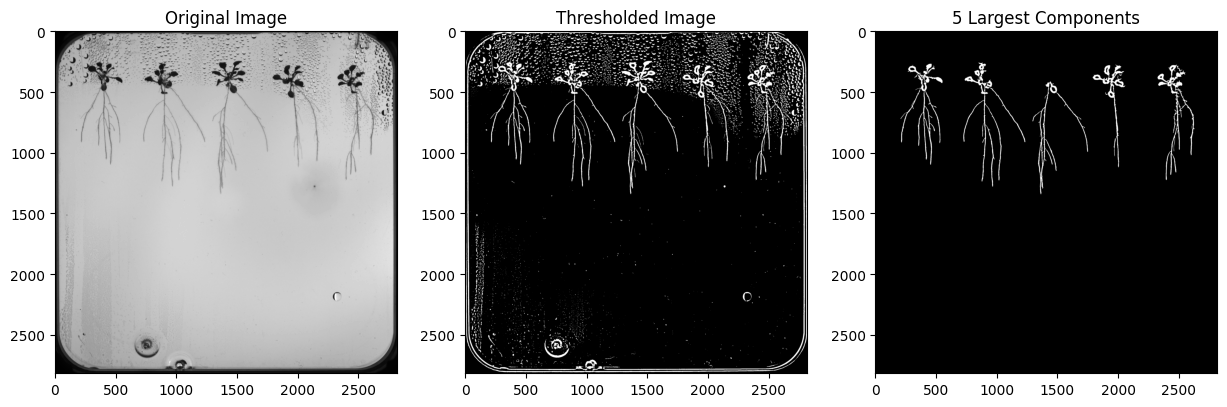

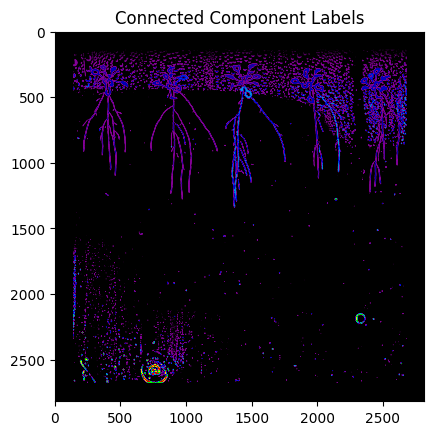

In [395]:
output_img, labels = process_image(
    image_path='cropped_image_2.png', 
    edge_thickness=None,          # Automatically calculated (5% of image size)
    min_contour_area=None,        # Automatically calculated (0.1% of image area)
    num_largest_components=5      # Number of largest components to retain
)


In [396]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path, edge_thickness=None, min_contour_area=None, num_largest_components=5):
    # Step 1: Load the image and pre-process it
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded.")
    
    # Set edge thickness and contour area dynamically if not provided
    if edge_thickness is None:
        edge_thickness = int(0.05 * min(img.shape[:2]))  # 5% of image height/width
    if min_contour_area is None:
        min_contour_area = 0.001 * img.shape[0] * img.shape[1]  # 0.1% of total image area

    # Step 2: Threshold and blur to remove noise
    blurred = cv2.GaussianBlur(img, (3, 3), 0)
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 31, 10)  # Larger block size

    # Step 3: Morphological closing to close gaps in contours
    kernel = np.ones((2, 2), np.uint8)
    cleaned = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    # Step 4: Remove edge noise using a mask
    mask = np.zeros_like(cleaned)
    mask[edge_thickness:-edge_thickness, edge_thickness:-edge_thickness] = 255 
    cleaned = cv2.bitwise_and(cleaned, mask)

    # Step 5: Filter small contours based on area
    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    # Step 6: Draw and fill filtered contours
    output_img = np.zeros_like(img)
    cv2.fillPoly(output_img, filtered_contours, 255)  # Fill the contours

    # Step 7: Perform connected components analysis to extract largest components
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned)
    areas = stats[1:, cv2.CC_STAT_AREA]  # Exclude background
    sorted_indices = np.argsort(areas)[::-1]  # Sort areas in descending order

    # Handle case where there are fewer components than expected
    if len(sorted_indices) < num_largest_components:
        print(f"Warning: Only {len(sorted_indices)} components found. Returning all available components.")
        num_largest_components = len(sorted_indices)
        
    largest_indices = sorted_indices[:num_largest_components] + 1  # Keep the N largest components

    # Step 8: Create an output image with only the largest connected components
    output_img = np.zeros_like(cleaned)
    for index in largest_indices:
        output_img[labels == index] = 255  # Fill the connected component

    # Step 9: Display the results
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image')

    plt.subplot(1, 3, 3)
    plt.imshow(output_img, cmap='gray')
    plt.title(f'{num_largest_components} Largest Components (Filled)')
    plt.show()
    
    return output_img, labels


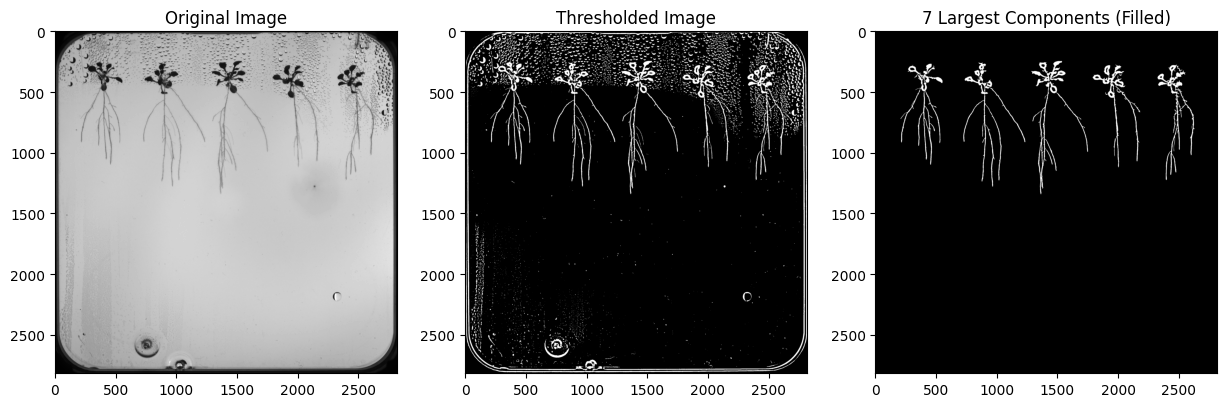

In [397]:
output_img, labels = process_image(
    image_path='cropped_image_2.png', 
    edge_thickness=None,         
    min_contour_area=None,       
    num_largest_components=7 
)


In [398]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path, edge_thickness=None, min_contour_area=None, min_component_ratio=0.001):
   
    # Step 1: Load the image and pre-process it
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded.")
    
    height, width = img.shape
    image_area = height * width

    # Set edge thickness and contour area dynamically if not provided
    if edge_thickness is None:
        edge_thickness = int(0.05 * min(img.shape[:2]))  # 5% of image height/width
    if min_contour_area is None:
        min_contour_area = 0.001 * image_area  # 0.1% of total image area

    # Step 2: Threshold and blur to remove noise
    blurred = cv2.GaussianBlur(img, (3, 3), 0)
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 31, 10)

    # Step 3: Morphological closing to close gaps in contours
    kernel = np.ones((2, 2), np.uint8)
    cleaned = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    # Step 4: Remove edge noise using a mask
    mask = np.zeros_like(cleaned)
    mask[edge_thickness:-edge_thickness, edge_thickness:-edge_thickness] = 255 
    cleaned = cv2.bitwise_and(cleaned, mask)

    # Step 5: Filter small contours based on area
    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    # Step 6: Draw and fill filtered contours
    output_img = np.zeros_like(img)
    cv2.fillPoly(output_img, filtered_contours, 255)

    # Step 7: Perform connected components analysis
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned)
    areas = stats[1:, cv2.CC_STAT_AREA]  # Exclude background

    # Calculate dynamic component size threshold
    min_component_size = min_component_ratio * image_area

    # Filter components by size
    largest_indices = np.where(areas > min_component_size)[0] + 1 

    # Step 8: Create an output image with only the largest connected components
    output_img = np.zeros_like(cleaned)
    for index in largest_indices:
        output_img[labels == index] = 255  # Fill the connected component

    # Step 9: Display the results
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image')

    plt.subplot(1, 3, 3)
    plt.imshow(output_img, cmap='gray')
    plt.title(f'Largest Components (Dynamic)')
    plt.show()

    return output_img, labels


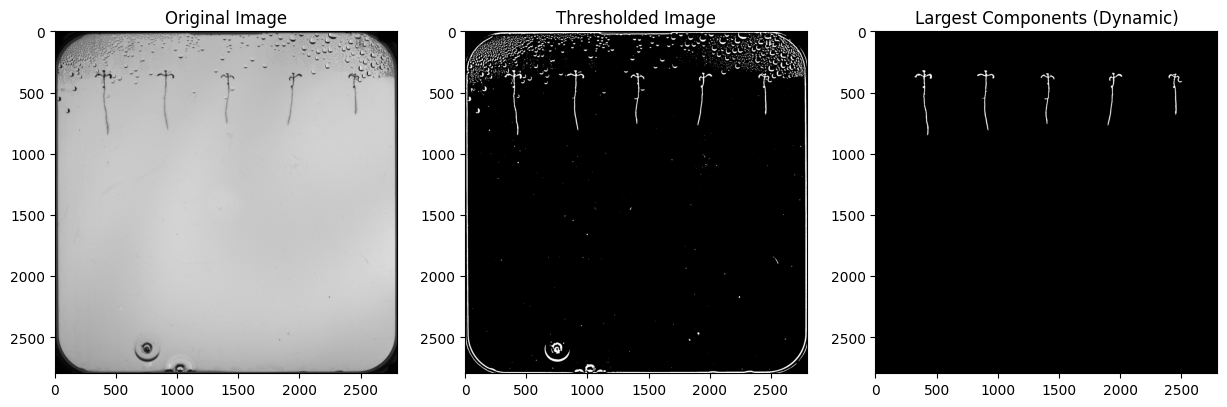

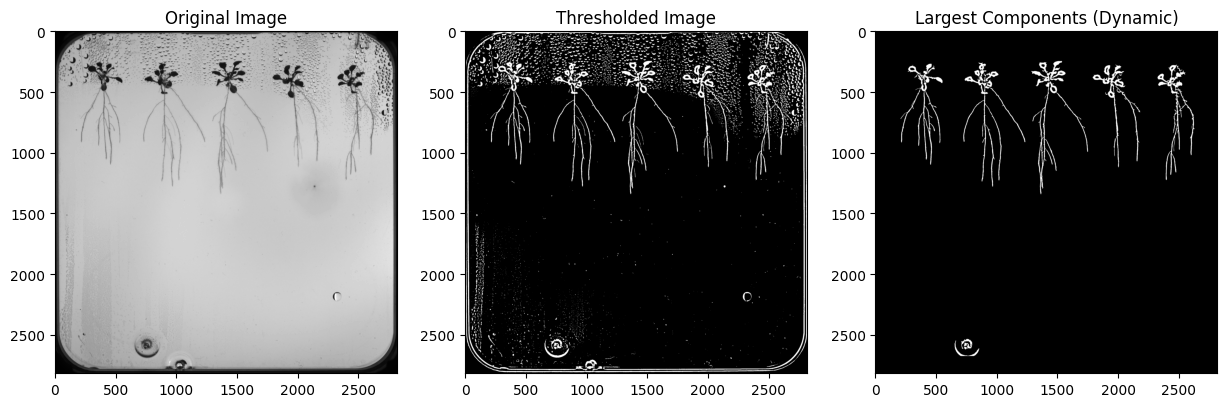

In [399]:
# Process image 1 (no need to specify how many largest components)
output_img1, labels1 = process_image(
    image_path='cropped_image_1.png', 
    min_component_ratio=0.00055 # Keep components larger than 0.1% of total image size
)

# Process image 2 (it will automatically adapt to 7 components if necessary)
output_img2, labels2 = process_image(
    image_path='cropped_image_2.png', 
    min_component_ratio=0.0004  # Same logic works for the second image
)


In [400]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path, roi_coords=None, edge_thickness=None, min_contour_area=None, min_component_ratio=0.001):
    # Step 1: Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded.")
    
    height, width = img.shape

    # Step 2: Define ROI and mask
    if roi_coords:
        x, y, w, h = roi_coords
    else:
        x, y, w, h = 0, 0, width, height  # Use the whole image if no ROI provided

    roi = img[y:y+h, x:x+w]  # Extract the ROI

    # Create a mask for the whole image with ROI set to white and outside set to black
    mask = np.zeros_like(img)
    mask[y:y+h, x:x+w] = 255  # ROI is white, outside is black

    # Step 3: Calculate dynamic parameters
    roi_height, roi_width = roi.shape
    roi_area = roi_height * roi_width

    if edge_thickness is None:
        edge_thickness = int(0.05 * min(roi_height, roi_width))  # 5% of the smaller ROI dimension
    if min_contour_area is None:
        min_contour_area = 0.001 * roi_area  # 0.1% of total ROI area

    # Step 4: Threshold and blur to remove noise
    blurred = cv2.GaussianBlur(roi, (3, 3), 0)
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 31, 10)

    # Step 5: Morphological closing to close gaps in contours
    kernel = np.ones((2, 2), np.uint8)
    cleaned = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    # Step 6: Remove edge noise using a mask
    roi_mask = np.zeros_like(cleaned)
    roi_mask[edge_thickness:-edge_thickness, edge_thickness:-edge_thickness] = 255 
    cleaned = cv2.bitwise_and(cleaned, roi_mask)

    # Step 7: Filter small contours based on area
    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    # Step 8: Draw and fill filtered contours
    processed_roi = np.zeros_like(roi)
    cv2.fillPoly(processed_roi, filtered_contours, 255)

    # Step 9: Perform connected components analysis
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned)
    areas = stats[1:, cv2.CC_STAT_AREA]  # Exclude background

    # Calculate dynamic component size threshold
    min_component_size = min_component_ratio * roi_area

    # Filter components by size
    largest_indices = np.where(areas > min_component_size)[0] + 1  # Indices are offset by 1

    # Step 10: Create an output image with only the largest connected components
    for index in largest_indices:
        processed_roi[labels == index] = 255  # Fill the connected component

    # Step 11: Paste the processed ROI back into the full image
    output_img = np.zeros_like(img)  # Black background for the whole image
    output_img[y:y+h, x:x+w] = processed_roi  # Place the ROI back into its position

    # Step 12: Display the results
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image (ROI)')

    plt.subplot(1, 3, 3)
    plt.imshow(output_img, cmap='gray')
    plt.title(f'Largest Components in ROI')
    plt.show()

    return output_img, labels


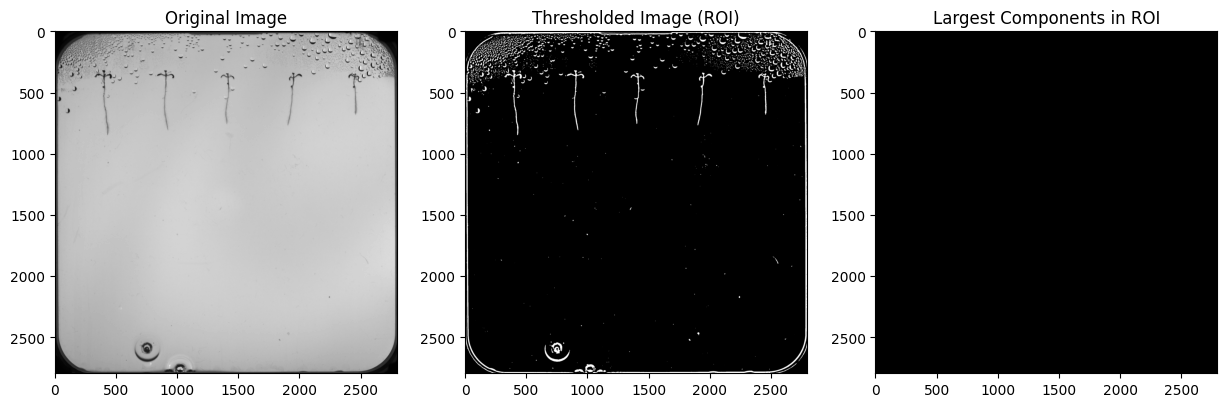

In [401]:
output_img1, labels1 = process_image('cropped_image_1.png')


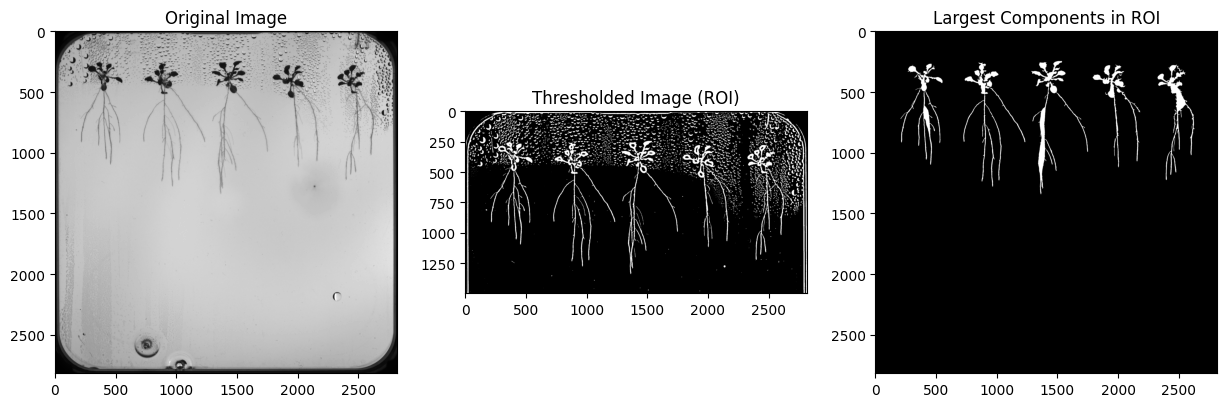

In [402]:
# Use an ROI with top-left at (50, 50) and dimensions 200x200
roi_coords = (0, 0, 3000, 1500)  # (x, y, w, h)
output_img2, labels2 = process_image('cropped_image_2.png', roi_coords=roi_coords)


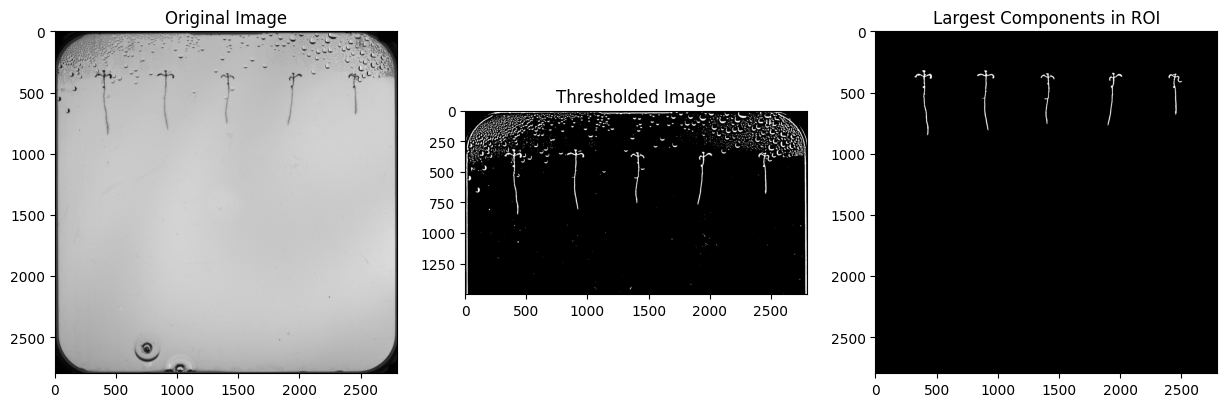

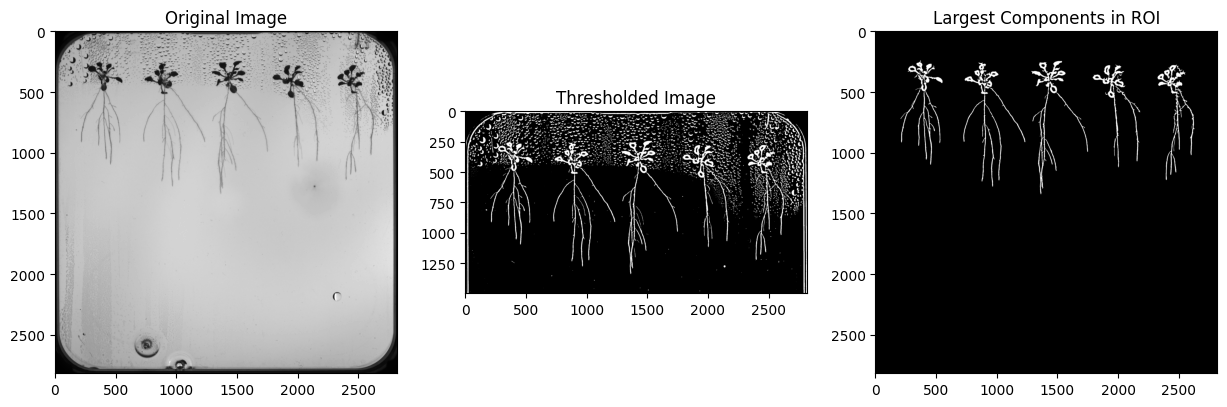

In [403]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path, roi_coords=(0, 0, 3000, 1500), edge_thickness=None, min_contour_area=None, min_component_ratio=0.001):
    # Step 1: Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded.")
    
    height, width = img.shape
    image_area = height * width
    
    # Step 2: Define ROI coordinates
    x, y, w, h = roi_coords
    roi = img[y:y+h, x:x+w]  # Extract the ROI from the original image
    
    # Set edge thickness and contour area dynamically if not provided
    if edge_thickness is None:
        edge_thickness = int(0.05 * min(roi.shape[:2]))  # 5% of ROI height/width
    if min_contour_area is None:
        min_contour_area = 0.001 * (roi.shape[0] * roi.shape[1])  # 0.1% of total ROI area

    # Step 3: Threshold and blur to remove noise
    blurred = cv2.GaussianBlur(roi, (3, 3), 0)
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 31, 10)

    # Step 4: Morphological closing to close gaps in contours
    kernel = np.ones((2, 2), np.uint8)
    cleaned = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    # Step 5: Remove edge noise using a mask
    mask = np.zeros_like(cleaned)
    mask[edge_thickness:-edge_thickness, edge_thickness:-edge_thickness] = 255 
    cleaned = cv2.bitwise_and(cleaned, mask)

    # Step 6: Filter small contours based on area
    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    # Step 7: Draw and fill filtered contours
    output_img = np.zeros_like(roi)
    cv2.fillPoly(output_img, filtered_contours, 255)

    # Step 8: Perform connected components analysis
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned)
    areas = stats[1:, cv2.CC_STAT_AREA]  # Exclude background
    
    # Calculate dynamic component size threshold
    min_component_size = min_component_ratio * (roi.shape[0] * roi.shape[1])

    # Filter components by size
    largest_indices = np.where(areas > min_component_size)[0] + 1  # Indices are offset by 1

    # Step 9: Create an output image with only the largest connected components in the ROI
    output_img = np.zeros_like(cleaned)
    for index in largest_indices:
        output_img[labels == index] = 255  # Fill the connected component

    # Step 10: Combine the processed ROI with the full image
    full_output_img = np.zeros_like(img)  # Create a black image of full size
    full_output_img[y:y+h, x:x+w] = output_img  # Paste the processed ROI back into the full image

    # Step 11: Display the results
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image')

    plt.subplot(1, 3, 3)
    plt.imshow(full_output_img, cmap='gray')
    plt.title(f'Largest Components in ROI')
    plt.show()


    return full_output_img, labels

# Example usage: Process image 1
output_img1, labels1 = process_image(
    image_path='cropped_image_1.png', 
    roi_coords=(0, 0, 3000, 1500),  
    min_component_ratio=0.00055  
)

# Example usage: Process image 2
output_img2, labels2 = process_image(
    image_path='cropped_image_2.png', 
    roi_coords=(0, 0, 3000, 1500),  
    min_component_ratio=0.0004 
)


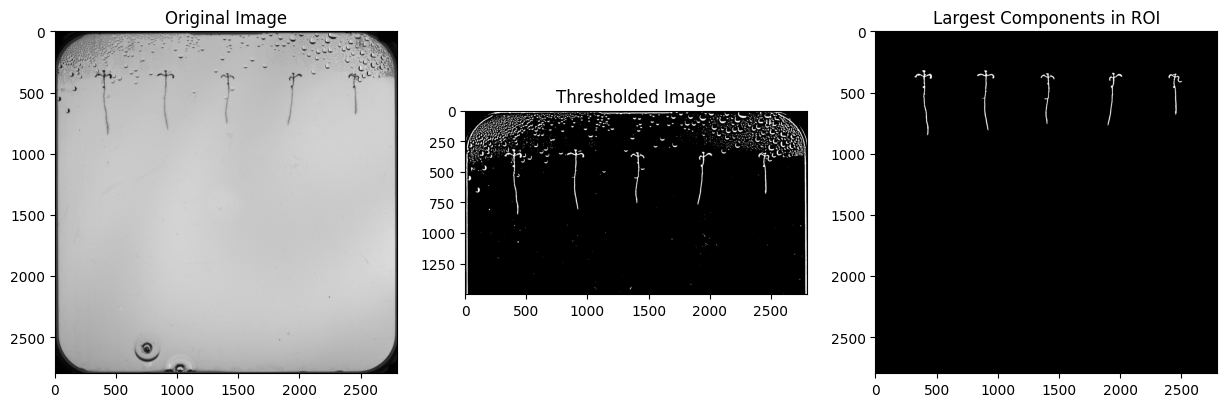

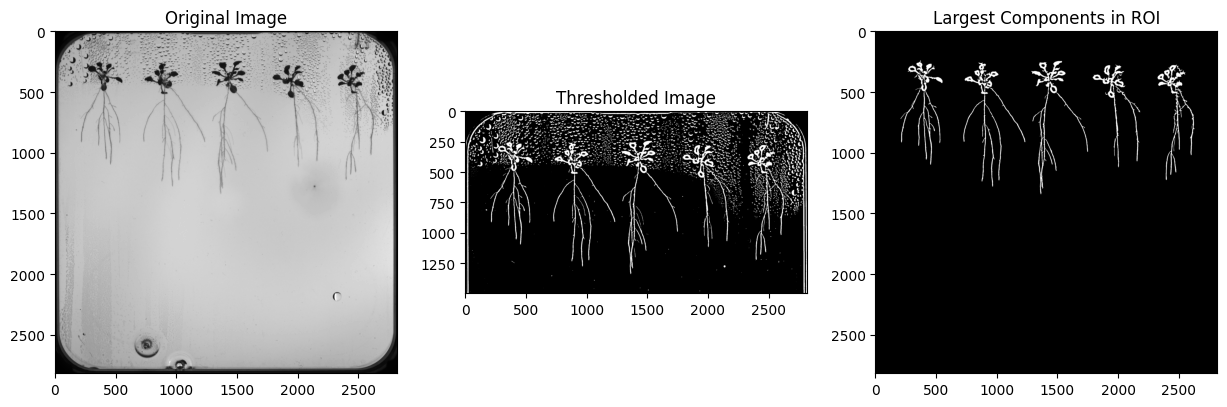

In [404]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path, roi_coords=(0, 0, 3000, 1500), edge_thickness=None, min_contour_area=None, min_component_ratio=0.001):
    # Step 1: Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded.")
    
    height, width = img.shape
    image_area = height * width
    
    # Step 2: Define ROI coordinates
    x, y, w, h = roi_coords
    roi = img[y:y+h, x:x+w]  # Extract the ROI from the original image
    
    # Set edge thickness and contour area dynamically if not provided
    if edge_thickness is None:
        edge_thickness = int(0.05 * min(roi.shape[:2]))  # 5% of ROI height/width
    if min_contour_area is None:
        min_contour_area = 0.001 * (roi.shape[0] * roi.shape[1])  # 0.1% of total ROI area

    # Step 3: Threshold and blur to remove noise
    blurred = cv2.GaussianBlur(roi, (3, 3), 0)
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 31, 10)

    # Step 4: Morphological closing to close gaps in contours
    kernel = np.ones((2, 2), np.uint8)
    cleaned = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    # Step 5: Remove edge noise using a mask
    mask = np.zeros_like(cleaned)
    mask[edge_thickness:-edge_thickness, edge_thickness:-edge_thickness] = 255 
    cleaned = cv2.bitwise_and(cleaned, mask)

    # Step 6: Filter small contours based on area
    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    # Step 7: Draw and fill filtered contours
    output_img = np.zeros_like(roi)
    cv2.drawContours(output_img, filtered_contours, -1, (255), thickness=cv2.FILLED)

    # Step 8: Perform connected components analysis
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned)
    areas = stats[1:, cv2.CC_STAT_AREA]  # Exclude background
    
    # Calculate dynamic component size threshold
    min_component_size = min_component_ratio * (roi.shape[0] * roi.shape[1])

    # Filter components by size
    largest_indices = np.where(areas > min_component_size)[0] + 1  # Indices are offset by 1

    # Step 9: Create an output image with only the largest connected components in the ROI
    output_img = np.zeros_like(cleaned)
    for index in largest_indices:
        output_img[labels == index] = 255  # Fill the connected component

    # Step 10: Combine the processed ROI with the full image
    full_output_img = np.zeros_like(img)  # Create a black image of full size
    full_output_img[y:y+h, x:x+w] = output_img  # Paste the processed ROI back into the full image

    # Step 11: Display the results
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image')

    plt.subplot(1, 3, 3)
    plt.imshow(full_output_img, cmap='gray')
    plt.title(f'Largest Components in ROI')
    plt.show()


    return full_output_img, labels

# Example usage: Process image 1
output_img1, labels1 = process_image(
    image_path='cropped_image_1.png', 
    roi_coords=(0, 0, 3000, 1500),  
    min_component_ratio=0.00055  
)

# Example usage: Process image 2
output_img2, labels2 = process_image(
    image_path='cropped_image_2.png', 
    roi_coords=(0, 0, 3000, 1500),  
    min_component_ratio=0.0004 
)


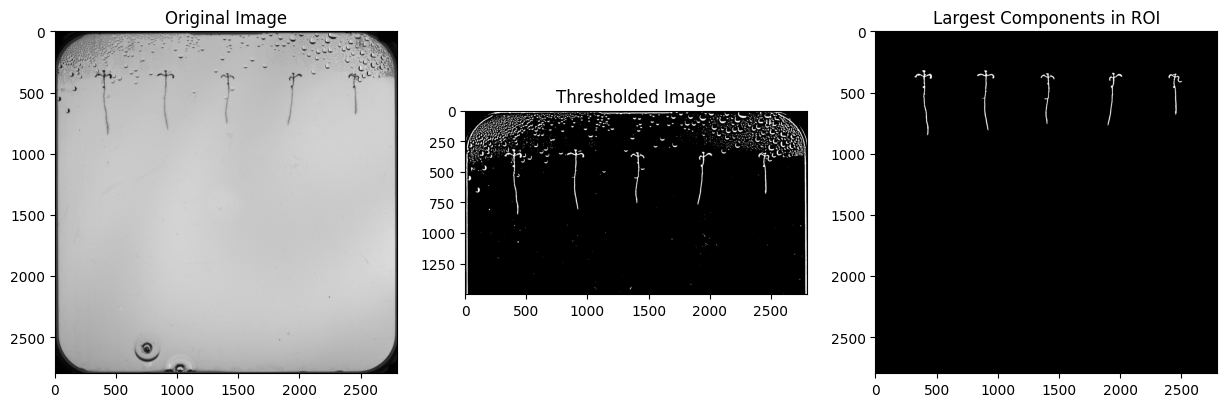

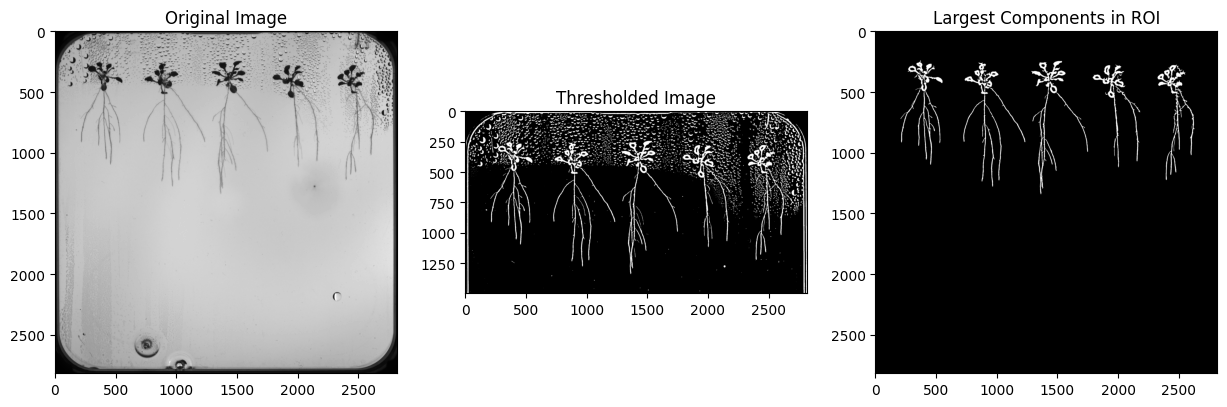

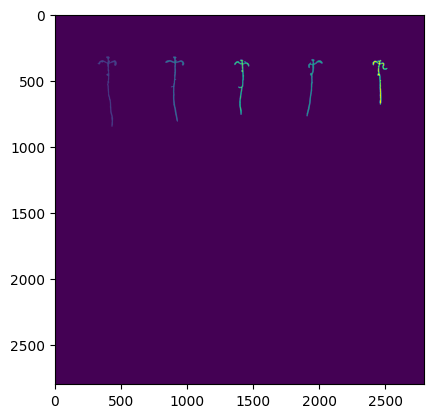

In [405]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path, roi_coords=(0, 0, 3000, 1500), edge_thickness=None, min_contour_area=None, min_component_ratio=0.001):
    # Step 1: Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded.")
    
    height, width = img.shape
    image_area = height * width
    
    # Step 2: Define ROI coordinates
    x, y, w, h = roi_coords
    roi = img[y:y+h, x:x+w]  # Extract the ROI from the original image
    
    # Set edge thickness and contour area dynamically if not provided
    if edge_thickness is None:
        edge_thickness = int(0.05 * min(roi.shape[:2]))  # 5% of ROI height/width
    if min_contour_area is None:
        min_contour_area = 0.001 * (roi.shape[0] * roi.shape[1])  # 0.1% of total ROI area

    # Step 3: Threshold and blur to remove noise
    blurred = cv2.GaussianBlur(roi, (3, 3), 0)
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 31, 10)

    # Step 4: Morphological closing to close gaps in contours
    kernel = np.ones((2, 2), np.uint8)
    cleaned = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    # Step 5: Remove edge noise using a mask
    mask = np.zeros_like(cleaned)
    mask[edge_thickness:-edge_thickness, edge_thickness:-edge_thickness] = 255 
    cleaned = cv2.bitwise_and(cleaned, mask)

    # Step 6: Perform connected components analysis
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned)
    areas = stats[1:, cv2.CC_STAT_AREA]  # Exclude background
    
    # Calculate dynamic component size threshold
    min_component_size = min_component_ratio * (roi.shape[0] * roi.shape[1])

    # Filter components by size
    largest_indices = np.where(areas > min_component_size)[0] + 1  # Indices are offset by 1

    # Step 7: Create an output image with only the largest connected components in the ROI
    output_img = np.zeros_like(cleaned)
    for index in largest_indices:
        output_img[labels == index] = 255  # Fill the connected component

    # Step 8: Combine the processed ROI with the full image
    full_output_img = np.zeros_like(img)  # Create a black image of full size
    full_output_img[y:y+h, x:x+w] = output_img  # Paste the processed ROI back into the full image

    # Step 9: Display the results
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image')

    plt.subplot(1, 3, 3)
    plt.imshow(full_output_img, cmap='gray')
    plt.title(f'Largest Components in ROI')
    plt.show()

    return full_output_img, labels

# Example usage: Process image 1
output_img1, labels1 = process_image(
    image_path='cropped_image_1.png', 
    roi_coords=(0, 0, 3000, 1500),  
    min_component_ratio=0.00055  
)

# Example usage: Process image 2
output_img2, labels2 = process_image(
    image_path='cropped_image_2.png', 
    roi_coords=(0, 0, 3000, 1500),  
    min_component_ratio=0.0004 
)

retval, labels, stats, centroids = cv2.connectedComponentsWithStats(output_img1)
plt.imshow(labels)



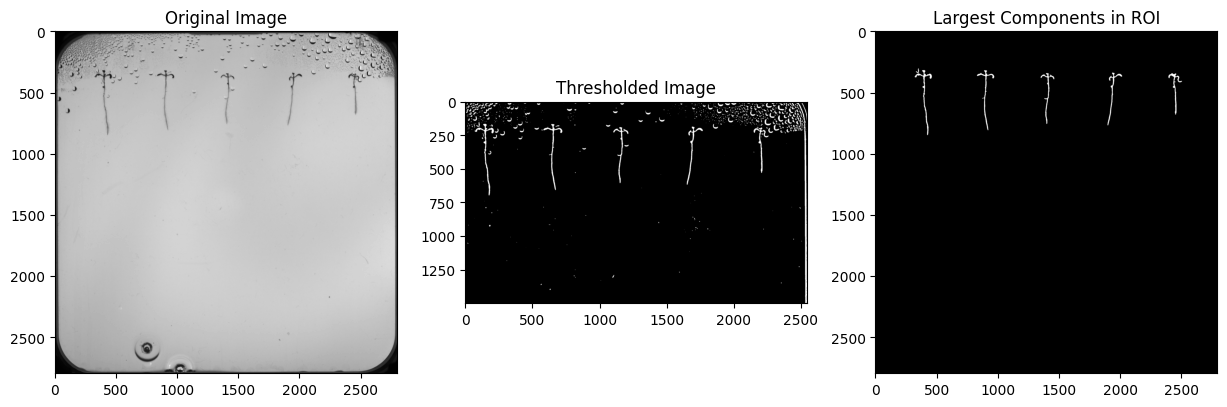

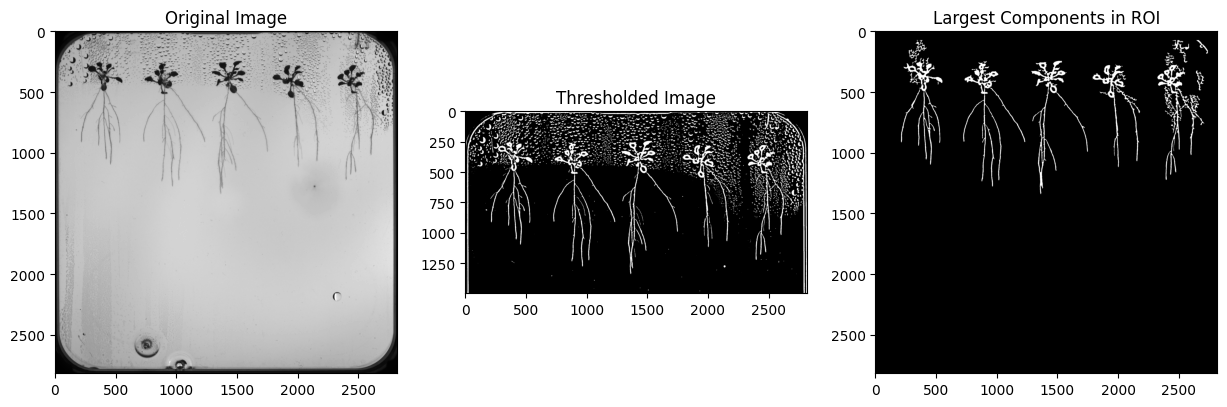

In [406]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path, roi_coords=(0, 0, 3000, 1500), edge_thickness=None, min_contour_area=None, min_component_ratio=0.001):
    # Step 1: Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded.")
    
    height, width = img.shape
    image_area = height * width
    
    # Step 2: Define ROI coordinates
    x, y, w, h = roi_coords
    roi = img[y:y+h, x:x+w]  # Extract the ROI from the original image
    
    # Set edge thickness and contour area dynamically if not provided
    if edge_thickness is None:
        edge_thickness = int(0.05 * min(roi.shape[:2]))  # 5% of ROI height/width
    if min_contour_area is None:
        min_contour_area = 0.001 * (roi.shape[0] * roi.shape[1])  # 0.1% of total ROI area

    # Step 3: Threshold and blur to remove noise
    blurred = cv2.GaussianBlur(roi, (5, 5), 0)  # Increased kernel size for more blurring
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 31, 10)  # Adjusted threshold parameters

    # Step 4: Morphological closing to close gaps in contours (increased kernel size)
    kernel = np.ones((7, 7), np.uint8)  # Larger kernel size for closing operation
    cleaned = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    # Step 5: Remove edge noise using a mask
    mask = np.zeros_like(cleaned)
    mask[edge_thickness:-edge_thickness, edge_thickness:-edge_thickness] = 255 
    cleaned = cv2.bitwise_and(cleaned, mask)

    # Step 6: Perform connected components analysis
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned, connectivity=4)  # 8-connectivity
    areas = stats[1:, cv2.CC_STAT_AREA]  # Exclude background
    
    # Calculate dynamic component size threshold
    min_component_size = min_component_ratio * (roi.shape[0] * roi.shape[1])

    # Filter components by size
    largest_indices = np.where(areas > min_component_size)[0] + 1  # Indices are offset by 1

    # Step 7: Create an output image with only the largest connected components in the ROI
    output_img = np.zeros_like(cleaned)  # Blank image to fill the components
    for index in largest_indices:
        output_img[labels == index] = 255  # Fill the connected component regions

    # Step 8: Combine the processed ROI with the full image
    full_output_img = np.zeros_like(img)  # Create a black image of full size
    full_output_img[y:y+h, x:x+w] = output_img  # Paste the processed ROI back into the full image

    # Step 9: Display the results
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image')

    plt.subplot(1, 3, 3)
    plt.imshow(full_output_img, cmap='gray')
    plt.title(f'Largest Components in ROI')
    plt.show()

    return full_output_img, labels

# Example usage: Process image 1
output_img1, labels1 = process_image(
    image_path='cropped_image_1.png', 
    roi_coords=(250, 150, 3000, 1500),  
    min_component_ratio=0.00055  
)

# Example usage: Process image 2
output_img2, labels2 = process_image(
    image_path='cropped_image_2.png', 
    roi_coords=(0, 0, 3000, 1500),  
    min_component_ratio=0.0004 
)


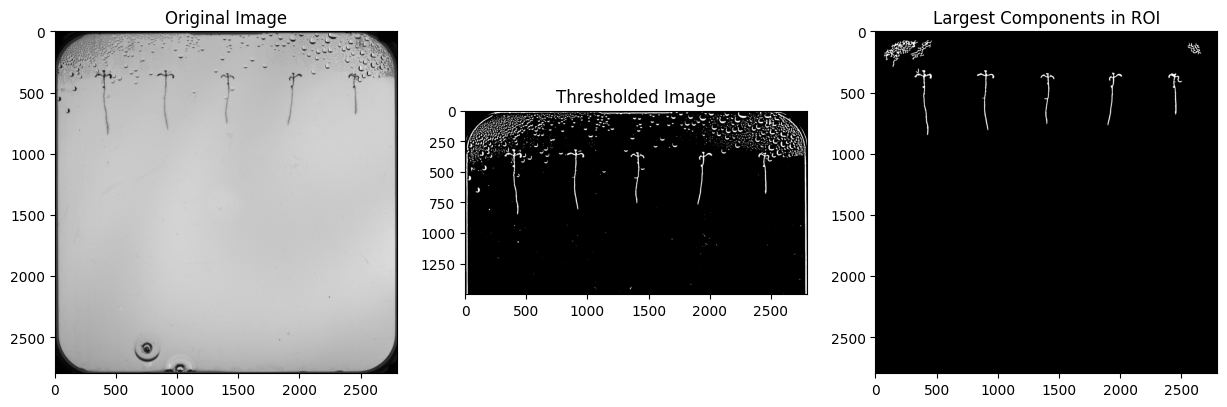

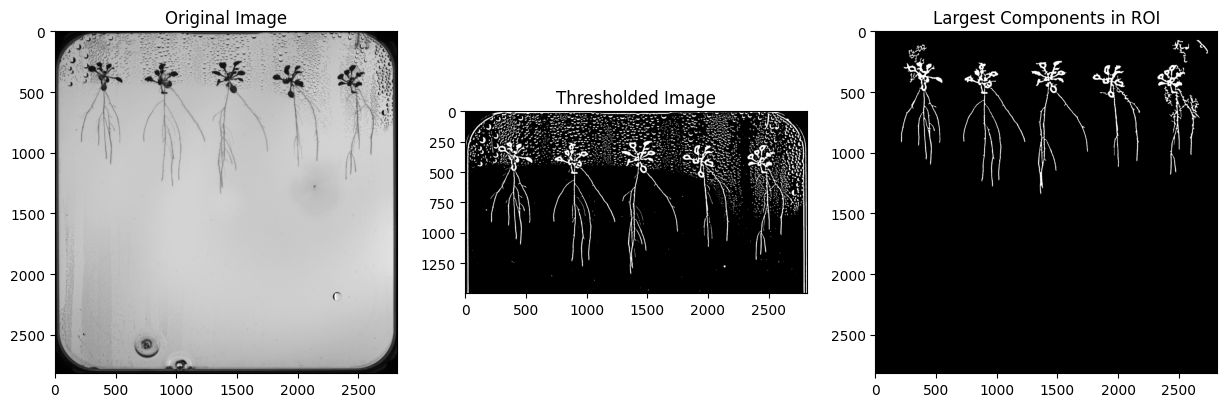

In [407]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path, roi_coords=(0, 0, 3000, 1500), edge_thickness=None, min_contour_area=None, min_component_ratio=0.001):
    # Step 1: Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded.")
    
    height, width = img.shape
    image_area = height * width
    
    # Step 2: Define ROI coordinates
    x, y, w, h = roi_coords
    roi = img[y:y+h, x:x+w]  # Extract the ROI from the original image
    
    # Set edge thickness and contour area dynamically if not provided
    if edge_thickness is None:
        edge_thickness = int(0.05 * min(roi.shape[:2]))  # 5% of ROI height/width
    if min_contour_area is None:
        min_contour_area = 0.001 * (roi.shape[0] * roi.shape[1])  # 0.1% of total ROI area

    # Step 3: Threshold and blur to remove noise
    blurred = cv2.GaussianBlur(roi, (5, 5), 0)  # Increased kernel size for more blurring
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 31, 10)  # Adjusted threshold parameters

    # Step 4: Morphological closing to close gaps in contours (increased kernel size)
    kernel = np.ones((7, 7), np.uint8)  # Larger kernel size for closing operation
    closed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    # Step 5: Morphological opening to remove small noise (background noise reduction)
    kernel_open = np.ones((3, 3), np.uint8)  # Smaller kernel size for opening operation
    cleaned = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel_open)

    # Step 6: Remove edge noise using a mask
    mask = np.zeros_like(cleaned)
    mask[edge_thickness:-edge_thickness, edge_thickness:-edge_thickness] = 255 
    cleaned = cv2.bitwise_and(cleaned, mask)

    # Step 7: Perform connected components analysis
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned, connectivity=8)  # 8-connectivity
    areas = stats[1:, cv2.CC_STAT_AREA]  # Exclude background
    
    # Calculate dynamic component size threshold
    min_component_size = min_component_ratio * (roi.shape[0] * roi.shape[1])

    # Filter components by size (remove small noise)
    largest_indices = np.where(areas > min_component_size)[0] + 1  # Indices are offset by 1

    # Step 8: Create an output image with only the largest connected components in the ROI
    output_img = np.zeros_like(cleaned)  # Blank image to fill the components
    for index in largest_indices:
        output_img[labels == index] = 255  # Fill the connected component regions

    # Step 9: Combine the processed ROI with the full image
    full_output_img = np.zeros_like(img)  # Create a black image of full size
    full_output_img[y:y+h, x:x+w] = output_img  # Paste the processed ROI back into the full image

    # Step 10: Display the results
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image')

    plt.subplot(1, 3, 3)
    plt.imshow(full_output_img, cmap='gray')
    plt.title(f'Largest Components in ROI')
    plt.show()

    return full_output_img, labels

# Example usage: Process image 1
output_img1, labels1 = process_image(
    image_path='cropped_image_1.png', 
    roi_coords=(0, 0, 3000, 1500),  
    min_component_ratio=0.00055  
)

# Example usage: Process image 2
output_img2, labels2 = process_image(
    image_path='cropped_image_2.png', 
    roi_coords=(0, 0, 3000, 1500),  
    min_component_ratio=0.0004 
)


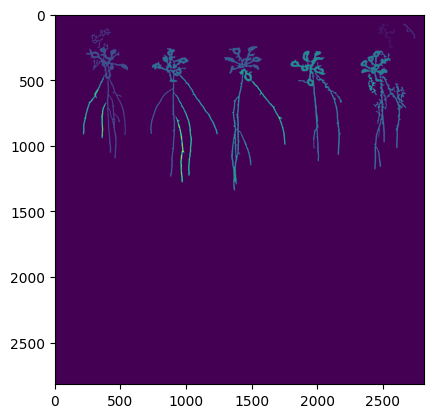

In [408]:
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(output_img2)
plt.imshow(labels)

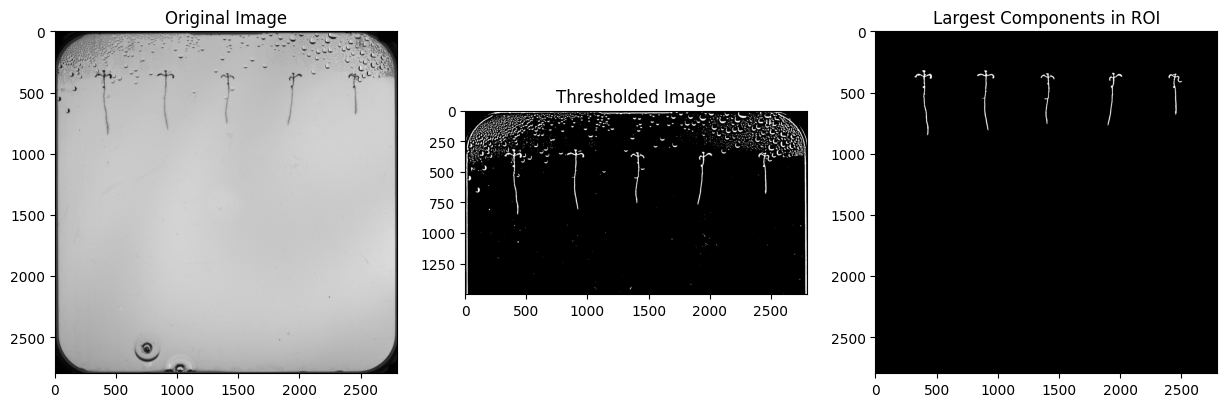

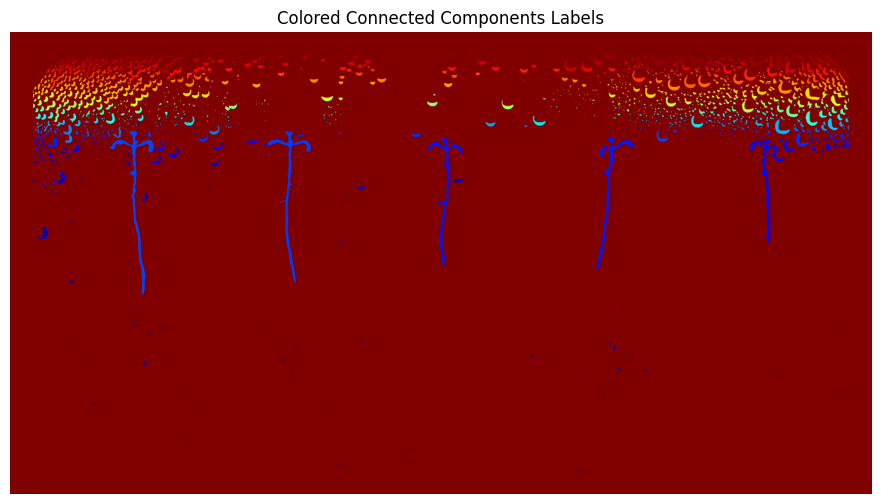

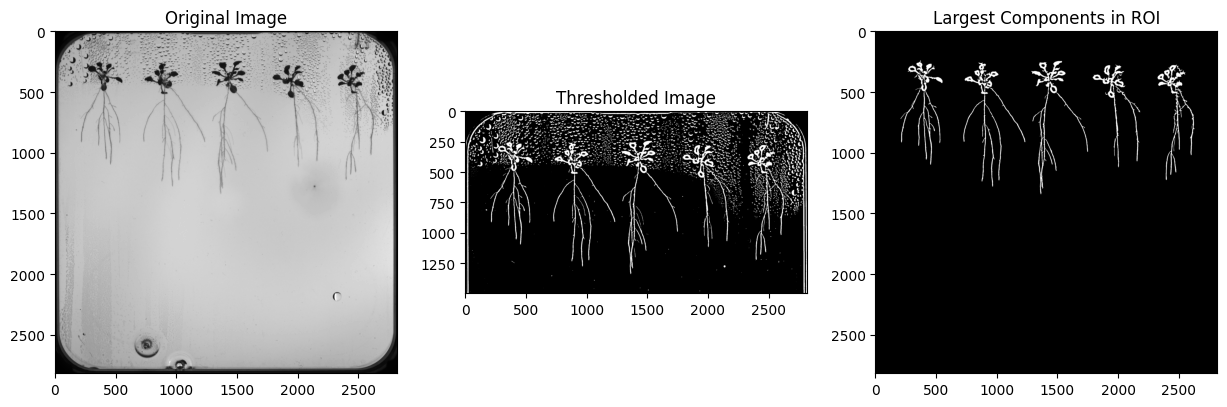

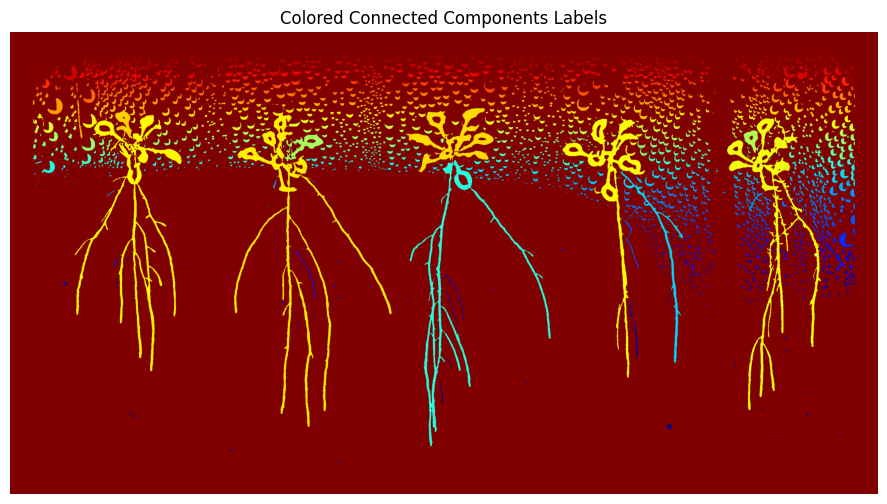

In [409]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path, roi_coords=(0, 0, 3000, 1500), edge_thickness=None, min_contour_area=None, min_component_ratio=0.001):
    # Step 1: Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded.")
    
    height, width = img.shape
    image_area = height * width
    
    # Step 2: Define ROI coordinates
    x, y, w, h = roi_coords
    
    # Automatically adjust ROI to fit within image dimensions
    w = min(w, width - x)  # Adjust the width if it exceeds the image width
    h = min(h, height - y)  # Adjust the height if it exceeds the image height
    roi = img[y:y+h, x:x+w]  # Extract the ROI from the original image
    
    # Set edge thickness and contour area dynamically if not provided
    if edge_thickness is None:
        edge_thickness = int(0.05 * min(roi.shape[:2]))  # 5% of ROI height/width
    if min_contour_area is None:
        min_contour_area = 0.001 * (roi.shape[0] * roi.shape[1])  # 0.1% of total ROI area

    # Step 3: Threshold and blur to remove noise
    blurred = cv2.GaussianBlur(roi, (3, 3), 0)
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 31, 10)

    # Step 4: Morphological closing to close gaps in contours
    kernel = np.ones((2, 2), np.uint8)
    cleaned = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    # Step 5: Remove edge noise using a mask
    mask = np.zeros_like(cleaned)
    mask[edge_thickness:-edge_thickness, edge_thickness:-edge_thickness] = 255 
    cleaned = cv2.bitwise_and(cleaned, mask)

    # Step 6: Perform connected components analysis
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned)
    areas = stats[1:, cv2.CC_STAT_AREA]  # Exclude background
    
    # Calculate dynamic component size threshold
    min_component_size = min_component_ratio * (roi.shape[0] * roi.shape[1])

    # Filter components by size
    largest_indices = np.where(areas > min_component_size)[0] + 1  # Indices are offset by 1

    # Step 7: Create an output image with only the largest connected components in the ROI
    output_img = np.zeros_like(cleaned)
    for index in largest_indices:
        output_img[labels == index] = 255  # Fill the connected component

    # Step 8: Combine the processed ROI with the full image
    full_output_img = np.zeros_like(img)  # Create a black image of full size
    full_output_img[y:y+h, x:x+w] = output_img  # Paste the processed ROI back into the full image

    # Step 9: Display the results
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image')

    plt.subplot(1, 3, 3)
    plt.imshow(full_output_img, cmap='gray')
    plt.title(f'Largest Components in ROI')
    plt.show()

    # Colorize the labels for better visualization
    colored_labels = cv2.applyColorMap(np.uint8(labels * 255 / np.max(labels)), cv2.COLORMAP_JET)

    # Display the colored labels
    plt.figure(figsize=(12, 6))
    plt.imshow(colored_labels)
    plt.title('Colored Connected Components Labels')
    plt.axis('off')
    plt.show()

    return full_output_img, labels

# Example usage: Process image 1
output_img1, labels1 = process_image(
    image_path='cropped_image_1.png', 
    roi_coords=(0, 0, 3000, 1500),  
    min_component_ratio=0.00055  
)

# Example usage: Process image 2
output_img2, labels2 = process_image(
    image_path='cropped_image_2.png', 
    roi_coords=(0, 0, 3000, 1500),  
    min_component_ratio=0.0004 
)


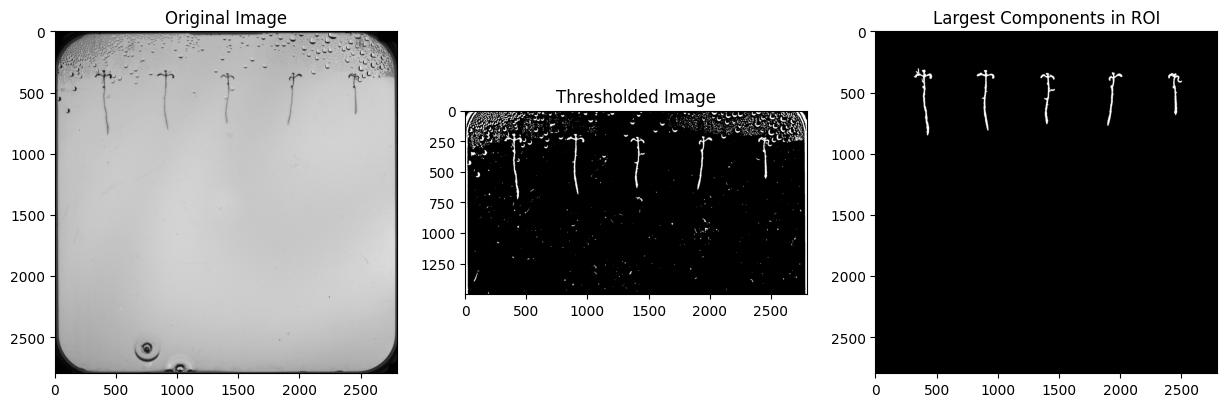

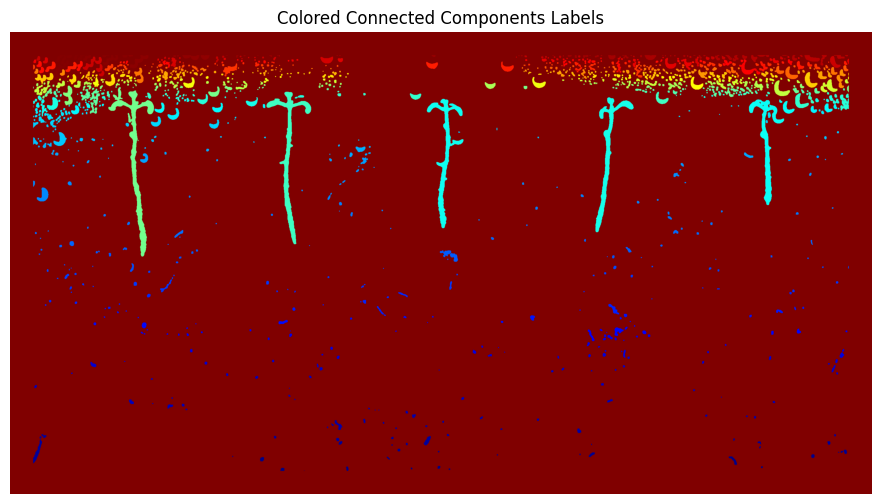

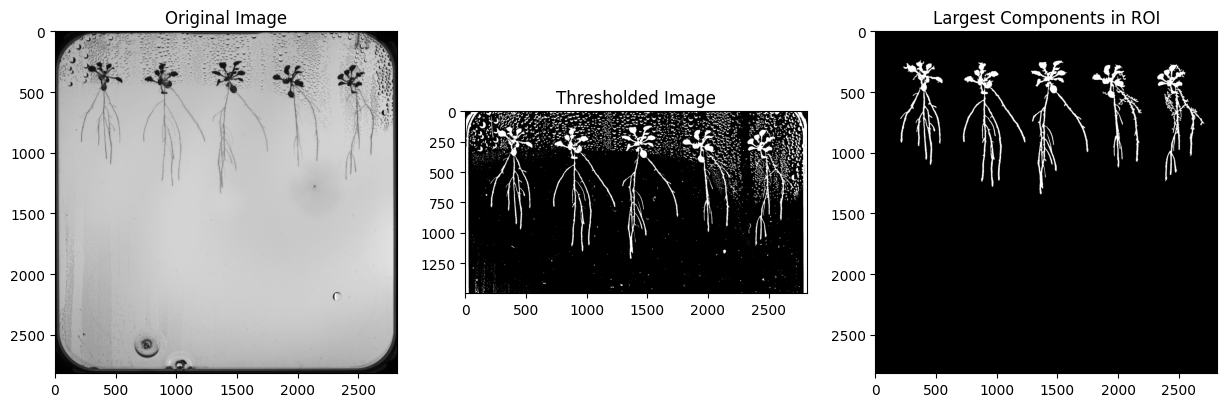

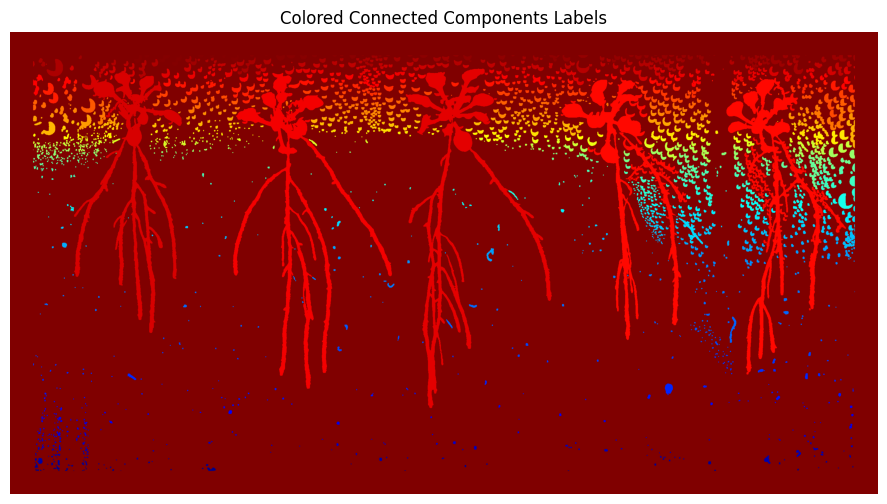

In [462]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path, roi_coords=(0, 0, 3000, 1500), edge_thickness=None, min_contour_area=None, min_component_ratio=0.001):
    # Step 1: Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded.")
    
    height, width = img.shape
    image_area = height * width
    
    # Step 2: Define ROI coordinates
    x, y, w, h = roi_coords
    
    # Automatically adjust ROI to fit within image dimensions
    w = min(w, width - x)  # Adjust the width if it exceeds the image width
    h = min(h, height - y)  # Adjust the height if it exceeds the image height
    roi = img[y:y+h, x:x+w]  # Extract the ROI from the original image
    
    # Set edge thickness and contour area dynamically if not provided
    if edge_thickness is None:
        edge_thickness = int(0.05 * min(roi.shape[:2]))  # 5% of ROI height/width
    if min_contour_area is None:
        min_contour_area = 0.001 * (roi.shape[0] * roi.shape[1])  # 0.1% of total ROI area

    # Step 3: Threshold and blur to remove noise
    blurred = cv2.GaussianBlur(roi, (3, 3), 0)
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 61, 5)

    # Step 4: Morphological closing to close gaps in contours
    kernel = np.ones((3, 3), np.uint8)
    cleaned = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    # Step 5: Apply gentle dilation to connect close components (not too aggressively)
    dilation_kernel = np.ones((3, 3), np.uint8)  # Slightly larger kernel for gentle dilation
    cleaned = cv2.dilate(cleaned, dilation_kernel, iterations=1)  # Apply dilation with 1 iteration

    # Step 6: Remove edge noise using a mask
    mask = np.zeros_like(cleaned)
    mask[edge_thickness:-edge_thickness, edge_thickness:-edge_thickness] = 255 
    cleaned = cv2.bitwise_and(cleaned, mask)

    # Step 7: Perform connected components analysis
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned)
    areas = stats[1:, cv2.CC_STAT_AREA] 
    
    # Calculate dynamic component size threshold
    min_component_size = min_component_ratio * (roi.shape[0] * roi.shape[1])

    # Filter components by size
    largest_indices = np.where(areas > min_component_size)[0] + 1  # Indices are offset by 1

    # Step 8: Create an output image with only the largest connected components in the ROI
    output_img = np.zeros_like(cleaned)
    for index in largest_indices:
        output_img[labels == index] = 255  # Fill the connected component

    # Step 9: Combine the processed ROI with the full image
    full_output_img = np.zeros_like(img)  # Create a black image of full size
    full_output_img[y:y+h, x:x+w] = output_img  # Paste the processed ROI back into the full image

    # Step 10: Display the results
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image')

    plt.subplot(1, 3, 3)
    plt.imshow(full_output_img, cmap='gray')
    plt.title(f'Largest Components in ROI')
    plt.show()

    # Colorize the labels for better visualization
    colored_labels = cv2.applyColorMap(np.uint8(labels * 255 / np.max(labels)), cv2.COLORMAP_JET)

    # Display the colored labels
    plt.figure(figsize=(12, 6))
    plt.imshow(colored_labels)
    plt.title('Colored Connected Components Labels')
    plt.axis('off')
    plt.show()

    return full_output_img, labels

# Example usage: Process image 1
output_img1, labels1 = process_image(
    image_path='cropped_image_1.png', 
    roi_coords=(0, 125, 3000, 1500),  
    min_component_ratio=0.00055  
)

# Example usage: Process image 2
output_img2, labels2 = process_image(
    image_path='cropped_image_2.png', 
    roi_coords=(0, 125, 3000, 1500),  
    min_component_ratio=0.00055
)


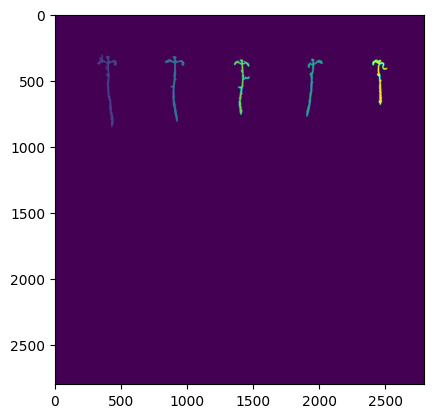

In [463]:
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(output_img1)
plt.imshow(labels)

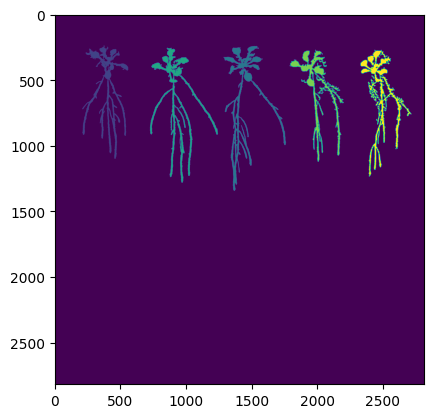

In [464]:
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(output_img2)
plt.imshow(labels)